### Курсовая работа. Классическое машинное обучение
### Раздел 2.2. Регрессия для CC50

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.svm import SVR
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

In [27]:
# Загрузить данные
df = pd.read_csv('cc50.csv')
display(df.head())
print(df.shape)

,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,MaxPartialCharge,MinPartialCharge,FpDensityMorgan1,BCUT2D_MWHI,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea,"CC50, mM"
0,-1.788262,1.268590,0.870224,-0.748934,1.097097,0.219317,-1.590886,1.549443,-2.056082,-0.588938,...,-0.208596,-0.11427,-0.0988,-0.032791,-0.032791,-0.243224,-0.280704,2.292130,-0.080539,175.482382
1,-2.133320,2.150705,0.962811,-0.539712,1.279553,0.251255,-1.795634,1.286626,-2.205560,-0.578681,...,-0.208596,-0.11427,-0.0988,-0.032791,-0.032791,-0.243224,-0.280704,2.292130,-0.080539,5.402819
2,-2.539798,2.207023,0.968722,-1.474490,1.037941,0.711670,-1.149492,1.125802,-2.392406,-0.553258,...,-0.208596,-0.11427,-0.0988,-0.032791,-0.032791,-0.243224,-0.280704,2.292130,-0.080539,161.142320
3,-1.787268,1.288909,0.872357,-0.932208,1.011964,0.330428,-1.590886,1.549443,-2.148861,-0.589009,...,-0.208596,-0.11427,-0.0988,-0.032791,-0.032791,-0.243224,-0.280704,3.111943,-0.080539,107.855654
4,-1.771076,0.566304,0.796513,-0.694778,0.585080,0.869343,-1.401150,2.029111,-2.235455,-0.588345,...,-0.208596,-0.11427,-0.0988,-0.032791,-0.032791,-0.243224,-0.280704,-0.167309,-0.080539,139.270991


(931, 146)


In [28]:
# Функция для определения выбросов по правилу трех сигм
def check_outliers(df, col):
    Q1 = df[col].quantile(0.05)
    Q3 = df[col].quantile(0.95)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col] < lower_bound) | (df[col] > upper_bound)].index.tolist()

In [29]:
for col in df.columns[:-1]:
    outliers = check_outliers(df, col)
    df = df.drop(outliers)

In [30]:
display(df.head())
print(df.shape)

,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,MaxPartialCharge,MinPartialCharge,FpDensityMorgan1,BCUT2D_MWHI,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea,"CC50, mM"
4,-1.771076,0.566304,0.796513,-0.694778,0.585080,0.869343,-1.401150,2.029111,-2.235455,-0.588345,...,-0.208596,-0.11427,-0.0988,-0.032791,-0.032791,-0.243224,-0.280704,-0.167309,-0.080539,139.270991
9,-1.470891,0.378324,0.776782,-0.644332,0.575957,0.884964,-0.894857,-0.616545,-2.235455,-0.477651,...,-0.208596,-0.11427,-0.0988,-0.032791,-0.032791,-0.243224,-0.280704,-0.167309,-0.080539,400.906360
12,-1.458284,1.241818,0.867414,-0.640281,0.703676,0.916902,-0.894881,-0.616545,-2.235455,-0.477650,...,-0.208596,-0.11427,-0.0988,-0.032791,-0.032791,-0.243224,-0.280704,-0.167309,-0.080539,634.625148
18,0.381119,-1.002388,-1.814970,0.746065,0.175607,0.332591,0.541374,-0.926426,0.565524,0.814376,...,-0.208596,-0.11427,-0.0988,-0.032791,-0.032791,-0.243224,-0.280704,-0.167309,-0.080539,751.968277
19,-1.414551,0.745990,0.815372,-0.077802,2.481585,-1.629497,-1.769623,1.132977,-1.322283,-0.591193,...,-0.208596,-0.11427,-0.0988,-0.032791,-0.032791,-0.243224,-0.280704,-0.167309,-0.080539,283.628863


(411, 146)


In [31]:
SEED = 42

In [32]:
# Разделить данные на признаки и целевую переменную
X = df.drop('CC50, mM', axis=1)
y = df['CC50, mM']

# Разделить данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

print(f'Train dataset size: {X_train.shape}, {y_train.shape}')
print(f'Train dataset size: {X_test.shape}, {y_test.shape}')

Train dataset size: (287, 145), (287,)
Train dataset size: (124, 145), (124,)


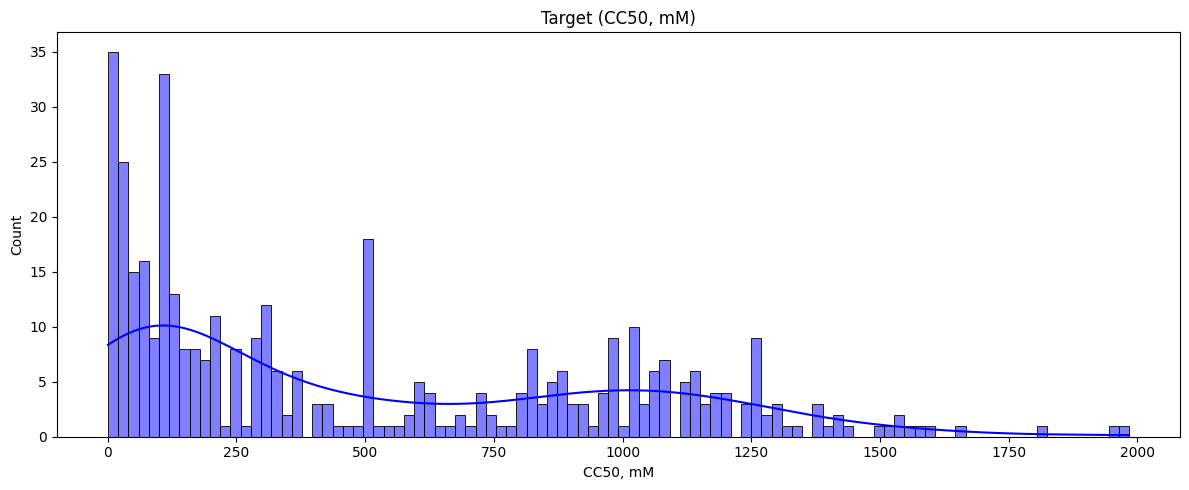

In [33]:
plt.figure(figsize=(12, 5))
sns.histplot(y, kde=True, bins=100, color='blue')
plt.title('Target (CC50, mM)')
plt.tight_layout()
plt.show()

В рамках настоящей задачи будем использовать следующие модели:
- Линейные модели (`Lasso`, `Ridge`, `ElasticNet`);
- `RandomForest`;
- `SVR`;
- `XGBoostRegressor`;
- `CatBoostRegressor`.
  
Для анализа эффективности моделей проверим следующие метрики:
- $MAE$;
- $MAPE$;
- $MSE$;
- $R^2$.

Для подбора наиболее оптимальных гиперпараметров воспользуемся поиском по сетке (`GridSearch`).

In [34]:
metrics = {
    'R2': 'r2',
    'MAE': 'neg_mean_absolute_error',
    'MAPE': 'neg_mean_absolute_percentage_error',
    'MSE': 'neg_mean_squared_error'
}
results = {}

**1. Lasso**

In [35]:
params_lr = {'alpha': [0.01, 0.1, 1, 2, 3, 4, 5, 10, 20, 50, 100]}

# Найти приемлимый alpha с помощью GridSearchCV
grid_lasso = GridSearchCV(Lasso(max_iter=10000),
                           param_grid=params_lr,
                           scoring=list(metrics.values()),
                           refit='r2',
                           cv=5,
                           n_jobs=-1)

# Обозначить лучшие гиперпараметры
best_params_lasso = grid_lasso.fit(X_train, y_train).best_params_
for param_name, param_values in params_lr.items():
    param = best_params_lasso[param_name]
    print(f"Лучшее полученное значение {param_name}: {param}")

# Создать модель линейной регрессии
lasso = grid_lasso.best_estimator_

for name, score_func in metrics.items():
    cv_scores = cross_validate(lasso, X_train, y_train, cv=5, scoring=score_func, return_train_score=True)
    if name == 'R2':
        print(f"Cross-Validation {name} scores: {cv_scores['train_score'].mean():.3f}")
    else:
        print(f"Cross-Validation {name} scores: {-cv_scores['train_score'].mean():.3f}")

lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
results['Lasso'] = {
    'MAE': mean_absolute_error(y_test, y_pred),
    'MAPE': mean_absolute_percentage_error(y_test, y_pred),
    'R2': r2_score(y_test, y_pred),
    'MSE': mean_squared_error(y_test, y_pred)
}

print(f'\n{results["Lasso"]}')

Лучшее полученное значение alpha: 10
Cross-Validation R2 scores: 0.497
Cross-Validation MAE scores: 270.144
Cross-Validation MAPE scores: 13.939
Cross-Validation MSE scores: 113152.542

{'MAE': 308.33659930613135, 'MAPE': 7.911840541561195, 'R2': 0.3286513683505181, 'MSE': 144203.13772069357}


**2. Ridge**

In [36]:
# Найти приемлимый alpha с помощью GridSearchCV
grid_ridge = GridSearchCV(Ridge(max_iter=10000),
                           param_grid=params_lr,
                           scoring=list(metrics.values()),
                           refit='r2',
                           cv=5,
                           n_jobs=-1)

# Обозначить лучшие гиперпараметры
best_params_ridge = grid_ridge.fit(X_train, y_train).best_params_
for param_name, param_values in params_lr.items():
    param = best_params_ridge[param_name]
    print(f"Лучшее полученное значение {param_name}: {param}")

# Создать модель линейной регрессии
ridge = grid_ridge.best_estimator_

for name, score_func in metrics.items():
    cv_scores = cross_validate(ridge, X_train, y_train, cv=5, scoring=score_func, return_train_score=True)
    if name == 'R2':
        print(f"Cross-Validation {name} scores: {cv_scores['train_score'].mean():.3f}")
    else:
        print(f"Cross-Validation {name} scores: {-cv_scores['train_score'].mean():.3f}")

ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
results['Ridge'] = {
    'MAE': mean_absolute_error(y_test, y_pred),
    'MAPE': mean_absolute_percentage_error(y_test, y_pred),
    'R2': r2_score(y_test, y_pred),
    'MSE': mean_squared_error(y_test, y_pred)
}

print(f'\n{results["Ridge"]}')

Лучшее полученное значение alpha: 50
Cross-Validation R2 scores: 0.511
Cross-Validation MAE scores: 266.154
Cross-Validation MAPE scores: 13.812
Cross-Validation MSE scores: 110080.171

{'MAE': 301.19786172640545, 'MAPE': 7.783861713465363, 'R2': 0.36297690254424353, 'MSE': 136830.14327142728}


**3. ElasticNet**

In [37]:
# Найти приемлимый alpha с помощью GridSearchCV
grid_en = GridSearchCV(ElasticNet(max_iter=10000),
                           param_grid=params_lr,
                           scoring=list(metrics.values()),
                           refit='r2',
                           cv=5,
                           n_jobs=-1)

# Обозначить лучшие гиперпараметры
best_params_en = grid_en.fit(X_train, y_train).best_params_
for param_name, param_values in params_lr.items():
    param = best_params_en[param_name]
    print(f"Лучшее полученное значение {param_name}: {param}")

# Создать модель линейной регрессии
elastic = grid_en.best_estimator_

for name, score_func in metrics.items():
    cv_scores = cross_validate(elastic, X_train, y_train, cv=5, scoring=score_func, return_train_score=True)
    if name == 'R2':
        print(f"Cross-Validation {name} scores: {cv_scores['train_score'].mean():.3f}")
    else:
        print(f"Cross-Validation {name} scores: {-cv_scores['train_score'].mean():.3f}")

elastic.fit(X_train, y_train)
y_pred = elastic.predict(X_test)
results['ElasticNet'] = {
    'MAE': mean_absolute_error(y_test, y_pred),
    'MAPE': mean_absolute_percentage_error(y_test, y_pred),
    'R2': r2_score(y_test, y_pred),
    'MSE': mean_squared_error(y_test, y_pred)
}

print(f'\n{results["ElasticNet"]}')

Лучшее полученное значение alpha: 1
Cross-Validation R2 scores: 0.454
Cross-Validation MAE scores: 286.389
Cross-Validation MAPE scores: 15.013
Cross-Validation MSE scores: 122863.841

{'MAE': 313.89375000139296, 'MAPE': 8.138077415212534, 'R2': 0.33372040714587103, 'MSE': 143114.32742890547}


**4. Random Forest**

In [38]:
params_rf = {
    'n_estimators': [50, 100, 150, 200, 300, 400],
    'max_depth': [5, 6, 7, 10, 20, 30]
}

grid_rf = GridSearchCV(RandomForestRegressor(random_state=SEED),
                           param_grid=params_rf,
                           scoring=list(metrics.values()),
                           refit='r2',
                           cv=5,
                           n_jobs=-1)

# Обозначить лучшие гиперпараметры
best_params_rf = grid_rf.fit(X_train, y_train).best_params_
for param_name, param_values in params_rf.items():
    param = best_params_rf[param_name]
    print(f"Лучшее полученное значение {param_name}: {param}")

# Создать модель Random Forest
best_rf = grid_rf.best_estimator_

for name, score_func in metrics.items():
    cv_scores = cross_validate(best_rf, X_train, y_train, cv=5, scoring=score_func, return_train_score=True)
    if name == 'R2':
        print(f"Cross-Validation {name} scores: {cv_scores['train_score'].mean():.3f}")
    else:
        print(f"Cross-Validation {name} scores: {-cv_scores['train_score'].mean():.3f}")

best_rf.fit(X_train, y_train)
y_pred = best_rf.predict(X_test)
results['Random Forest'] = {
    'MAE': mean_absolute_error(y_test, y_pred),
    'MAPE': mean_absolute_percentage_error(y_test, y_pred),
    'R2': r2_score(y_test, y_pred),
    'MSE': mean_squared_error(y_test, y_pred)
}

print(f'\n{results["Random Forest"]}')

Лучшее полученное значение n_estimators: 150
Лучшее полученное значение max_depth: 30
Cross-Validation R2 scores: 0.844
Cross-Validation MAE scores: 131.648
Cross-Validation MAPE scores: 10.812
Cross-Validation MSE scores: 35231.438

{'MAE': 294.8102593102888, 'MAPE': 6.584215909113847, 'R2': 0.34632090647043356, 'MSE': 140407.78800394974}


**5. SVR**

In [39]:
params_svr = {
    'C': [10, 20, 30, 50, 100, 200],
    'epsilon': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]
}

grid_svr = GridSearchCV(SVR(),
                           param_grid=params_svr,
                           scoring=list(metrics.values()),
                           refit='r2',
                           cv=5,
                           n_jobs=-1)

# Обозначить лучшие гиперпараметры
best_params_svr = grid_svr.fit(X_train, y_train).best_params_
for param_name, param_values in params_svr.items():
    param = best_params_svr[param_name]
    print(f"Лучшее полученное значение {param_name}: {param}")

# Создать модель SVR
best_svr = grid_svr.best_estimator_

for name, score_func in metrics.items():
    cv_scores = cross_validate(best_svr, X_train, y_train, cv=5, scoring=score_func, return_train_score=True)
    if name == 'R2':
        print(f"Cross-Validation {name} scores: {cv_scores['train_score'].mean():.3f}")
    else:
        print(f"Cross-Validation {name} scores: {-cv_scores['train_score'].mean():.3f}")

best_svr.fit(X_train, y_train)
y_pred = best_svr.predict(X_test)
results['SVR'] = {
    'MAE': mean_absolute_error(y_test, y_pred),
    'MAPE': mean_absolute_percentage_error(y_test, y_pred),
    'R2': r2_score(y_test, y_pred),
    'MSE': mean_squared_error(y_test, y_pred)
}

print(f'\n{results["SVR"]}')

Лучшее полученное значение C: 200
Лучшее полученное значение epsilon: 10
Cross-Validation R2 scores: 0.482
Cross-Validation MAE scores: 219.416
Cross-Validation MAPE scores: 6.172
Cross-Validation MSE scores: 116810.664

{'MAE': 285.67624338537223, 'MAPE': 4.807941552128766, 'R2': 0.29600103028083113, 'MSE': 151216.30640135682}


**6. XGBoost**

In [40]:
params_xgb = {
    'n_estimators': [10, 20, 25, 50, 100, 150, 200, 300],
    'learning_rate': [0.001, 0.025, 0.075, 0.01, 0.025, 0.05, 0.1]
}

grid_xgb = GridSearchCV(XGBRegressor(random_state=SEED),
                           param_grid=params_xgb,
                           scoring=list(metrics.values()),
                           refit='r2',
                           cv=5,
                           n_jobs=-1)

# Обозначить лучшие гиперпараметры
best_params_xgb = grid_xgb.fit(X_train, y_train).best_params_
for param_name, param_values in params_xgb.items():
    param = best_params_xgb[param_name]
    print(f"Лучшее полученное значение {param_name}: {param}")

# Создать модель XGBoost
best_xgb = grid_xgb.best_estimator_

for name, score_func in metrics.items():
    cv_scores = cross_validate(best_xgb, X_train, y_train, cv=5, scoring=score_func, return_train_score=True)
    if name == 'R2':
        print(f"Cross-Validation {name} scores: {cv_scores['train_score'].mean():.3f}")
    else:
        print(f"Cross-Validation {name} scores: {-cv_scores['train_score'].mean():.3f}")

best_xgb.fit(X_train, y_train)
y_pred = best_xgb.predict(X_test)
results['XGBoost'] = {
    'MAE': mean_absolute_error(y_test, y_pred),
    'MAPE': mean_absolute_percentage_error(y_test, y_pred),
    'R2': r2_score(y_test, y_pred),
    'MSE': mean_squared_error(y_test, y_pred)
}

print(f'\n{results["XGBoost"]}')

Лучшее полученное значение n_estimators: 25
Лучшее полученное значение learning_rate: 0.1
Cross-Validation R2 scores: 0.884
Cross-Validation MAE scores: 102.247
Cross-Validation MAPE scores: 11.029
Cross-Validation MSE scores: 26198.008

{'MAE': 305.94490599277646, 'MAPE': 7.208522145609343, 'R2': 0.22825454854801752, 'MSE': 165767.99352017412}


**7. CatBoost**

In [41]:
params_cat = {
    'n_estimators': [10, 20, 25, 50, 100, 150, 200],
    'learning_rate': [0.01, 0.025, 0.05, 0.1, 0.25, 0.5]
}

grid_cat = GridSearchCV(CatBoostRegressor(random_state=SEED),
                           param_grid=params_cat,
                           scoring=list(metrics.values()),
                           refit='r2',
                           cv=5,
                           n_jobs=-1)

# Обозначить лучшие гиперпараметры
best_params_cat = grid_cat.fit(X_train, y_train).best_params_
for param_name, param_values in params_cat.items():
    param = best_params_cat[param_name]
    print(f"Лучшее полученное значение {param_name}: {param}")

# Создать модель CatBoost
best_cat = grid_cat.best_estimator_

for name, score_func in metrics.items():
    cv_scores = cross_validate(best_cat, X_train, y_train, cv=5, scoring=score_func, return_train_score=True, n_jobs=-1)
    if name == 'R2':
        print(f"Cross-Validation {name} scores: {cv_scores['train_score'].mean():.3f}")
    else:
        print(f"Cross-Validation {name} scores: {-cv_scores['train_score'].mean():.3f}")

best_cat.fit(X_train, y_train)
y_pred = best_cat.predict(X_test)
results['CatBoost'] = {
    'MAE': mean_absolute_error(y_test, y_pred),
    'MAPE': mean_absolute_percentage_error(y_test, y_pred),
    'R2': r2_score(y_test, y_pred),
    'MSE': mean_squared_error(y_test, y_pred)
}

print(f'\n{results["CatBoost"]}')

0:	learn: 463.5934037	total: 4.75ms	remaining: 233ms
1:	learn: 448.2015957	total: 8.31ms	remaining: 199ms
2:	learn: 436.9752065	total: 12.3ms	remaining: 193ms
3:	learn: 426.5919913	total: 16.6ms	remaining: 190ms
4:	learn: 417.7122725	total: 20.3ms	remaining: 183ms
5:	learn: 407.8086250	total: 24.3ms	remaining: 178ms
6:	learn: 400.5567348	total: 28.6ms	remaining: 176ms
7:	learn: 394.0767825	total: 32ms	remaining: 168ms
8:	learn: 385.5467453	total: 35.5ms	remaining: 162ms
9:	learn: 378.0565553	total: 39.1ms	remaining: 156ms
10:	learn: 372.7276309	total: 42.8ms	remaining: 152ms
11:	learn: 367.2500624	total: 46.5ms	remaining: 147ms
12:	learn: 359.8376341	total: 49.8ms	remaining: 142ms
13:	learn: 353.7105219	total: 53.3ms	remaining: 137ms
14:	learn: 348.3544875	total: 57.2ms	remaining: 133ms
15:	learn: 342.2436346	total: 60.8ms	remaining: 129ms
16:	learn: 337.4970690	total: 64.6ms	remaining: 125ms
17:	learn: 332.7826432	total: 68.4ms	remaining: 122ms
18:	learn: 328.4337745	total: 71.9ms	rem

In [42]:
# Вывод результатов
print(f"{'Model':<20} | {'MAE':<8} | {'MAPE':<8} | {'R2':<6} | {'MSE':<8}")
print("-"*60)
for model, metrics in results.items():
    print(f"{model:<20} | {metrics['MAE']:.4f} |{metrics['MAPE']:.4f} | {metrics['R2']:.4f} | {metrics['MSE']:.4f}")

Model                | MAE      | MAPE     | R2     | MSE     
------------------------------------------------------------
Lasso                | 308.3366 |7.9118 | 0.3287 | 144203.1377
Ridge                | 301.1979 |7.7839 | 0.3630 | 136830.1433
ElasticNet           | 313.8938 |8.1381 | 0.3337 | 143114.3274
Random Forest        | 294.8103 |6.5842 | 0.3463 | 140407.7880
SVR                  | 285.6762 |4.8079 | 0.2960 | 151216.3064
XGBoost              | 305.9449 |7.2085 | 0.2283 | 165767.9935
CatBoost             | 299.1926 |7.5954 | 0.3811 | 132942.7709


In [43]:
# Вывод лучших гиперпараметров
print('Lasso: ', best_params_lasso)
print('Ridge: ', best_params_ridge)
print('ElasticNet: ', best_params_en)
print('Random Forest: ', best_params_rf)
print('SVR: ', best_params_svr)
print('XGBoost: ', best_params_xgb)
print('CatBoost: ', best_params_cat)

Lasso:  {'alpha': 10}
Ridge:  {'alpha': 50}
ElasticNet:  {'alpha': 1}
Random Forest:  {'max_depth': 30, 'n_estimators': 150}
SVR:  {'C': 200, 'epsilon': 10}
XGBoost:  {'learning_rate': 0.1, 'n_estimators': 25}
CatBoost:  {'learning_rate': 0.1, 'n_estimators': 50}


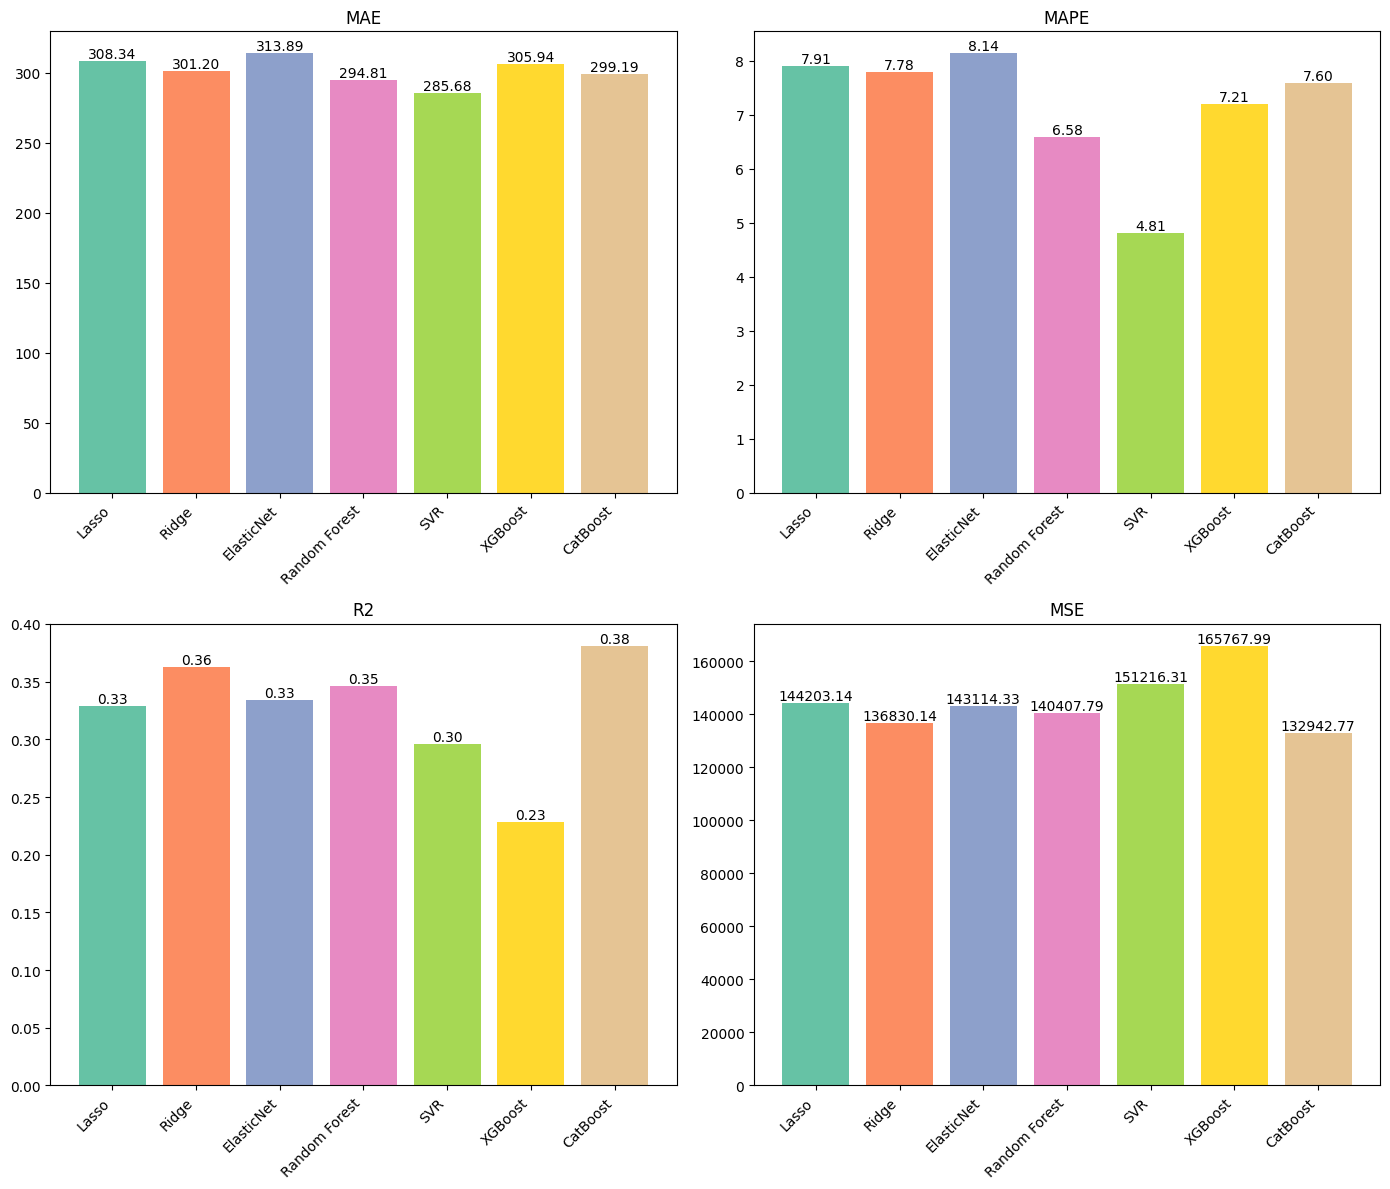

In [44]:
# Построить графики результатов
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
palette = sns.color_palette("Set2", len(results))

for i, metric in enumerate(list(metrics.keys())):
    ax = axes[i // 2, i % 2]
    
    models = list(results.keys())
    values = [results[model][metric] for model in models]
    bars = ax.bar(models, values, color=palette)
    ax.set_title(metric)
    
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}',
                ha='center', va='bottom')
    
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

**Выводы**  
  
1. В рамках настоящей задачи были рассмотрены следующие модели:
- Линейные модели (`Lasso`, `Ridge`, `ElasticNet`);
- `RandomForest`;
- `SVR`;
- `XGBoostRegressor`;
- `CatBoostRegressor`.
  
   Наиболее оптимальной моделью по совокупности использованных метрик принимается `CatBoost`.
2. Метрики всех моделей оказались недостаточно высокими. В качестве рекомендаций по дальнейшему улучшению предсказательной способности моделей требуется более глубокая обработка исходных данных. Как показал ранее выполненный EDA, в данных присутствует существенное число выбросов, однако для их эффективного устранения требуется знание специфики отрасли и понимание ключевой важности тех или иных признаков, что не было выполнено в настоящей работе.